# 1. CLEAN THE DATA BEFORE ANALYSING

In [2]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


In [3]:
# Load the dataset and display summary info about the dataset
df = pd.read_csv("D:\\Data Analysis\\Anna. Project\\Python\\Cyber Security Attacks\\cybersecurity_attacks.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64


In [5]:
# Fill missing values with no data
missing_columns = ['Malware Indicators','Alerts/Warnings','Proxy Information','IDS/IPS Alerts','Firewall Logs', ]

fillvalaues = ['None', 'No Data', 'No Detected', 'No Data', 'No Data']
for i in range(len(fillvalaues)):
    df.fillna({missing_columns[i]: fillvalaues[i]}, inplace=True)
# Display only the updated columns
print(df[missing_columns].head()) 


  Malware Indicators  Alerts/Warnings Proxy Information IDS/IPS Alerts  \
0       IoC Detected          No Data      150.9.97.135        No Data   
1       IoC Detected          No Data       No Detected        No Data   
2       IoC Detected  Alert Triggered    114.133.48.179     Alert Data   
3               None  Alert Triggered       No Detected     Alert Data   
4               None  Alert Triggered     149.6.110.119     Alert Data   

  Firewall Logs  
0      Log Data  
1      Log Data  
2      Log Data  
3       No Data  
4       No Data  


In [6]:
# Verify that missing values were replaced correctly.
df.head().isnull().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

In [7]:
# Check for duplicate values
print("\nDuplicate Values:")
print(df.duplicated().sum())


Duplicate Values:
0


In [8]:
# Creating Additional Time Columns
# Check Timestamp data type
print(df["Timestamp"].dtype)  

# Convert Timestamp column to datetime format 
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

# Extracting additional time components
df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month
df["Month_short"] = df["Timestamp"].dt.strftime("%b")
df["DayofWeek"] = df["Timestamp"].dt.dayofweek
df["Day"] = df["Timestamp"].dt.day
df

object


C:\Users\annaq\AppData\Local\Temp\ipykernel_46256\464087536.py:6: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Year,Month,Month_short,DayofWeek,Day
0,2023-05-30 06:33:00,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,"Jamshedpur, Sikkim",150.9.97.135,Log Data,No Data,Server,2023,5,May,1,30
1,2020-08-26 07:08:00,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,"Bilaspur, Nagaland",No Detected,Log Data,No Data,Firewall,2020,8,Aug,2,26
2,2022-11-13 08:23:00,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall,2022,11,Nov,6,13
3,2023-07-02 10:38:00,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,"Jaunpur, Rajasthan",No Detected,No Data,Alert Data,Firewall,2023,7,Jul,6,2
4,2023-07-16 13:11:00,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,"Anantapur, Tripura",149.6.110.119,No Data,Alert Data,Firewall,2023,7,Jul,6,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:00,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,"Nashik, Manipur",No Detected,Log Data,Alert Data,Firewall,2023,5,May,4,26
39996,2023-03-27 00:38:00,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,"Vadodara, Mizoram",60.51.30.46,Log Data,No Data,Firewall,2023,3,Mar,0,27
39997,2022-03-31 01:45:00,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,"Mahbubnagar, Himachal Pradesh",No Detected,Log Data,Alert Data,Server,2022,3,Mar,3,31
39998,2023-09-22 18:32:00,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,"Rourkela, Arunachal Pradesh",137.76.130.8,Log Data,No Data,Server,2023,9,Sep,4,22


In [37]:
# Extract information from Device Information Collumn

# Creating Devices collumn
import re

devices = [
    r'Windows',
    r'Linux',
    r'Android',
    r'iPad',
    r'iPod',
    r'iPhone',
    r'Macintosh']


def device_os_finder(user_agent):
    for device in devices:
        match_device = re.search(device, user_agent, re.I)  # re.I makes the search case-insensitive
        if match_device:
            return match_device.group()
    return 'Unknown'

# Extract device or OS
df['Device/OS'] = df['Device Information'].apply(device_os_finder)
df['Device/OS'].head(10)

0      Windows
1      Windows
2      Windows
3    Macintosh
4      Windows
5        Linux
6        Linux
7    Macintosh
8    Macintosh
9      Windows
Name: Device/OS, dtype: object

In [38]:
# Creating a Browser Column
df['Browser'] = df['Device Information'].str.split('/').str[0]
df['Browser']

0        Mozilla
1        Mozilla
2        Mozilla
3        Mozilla
4        Mozilla
          ...   
39995    Mozilla
39996    Mozilla
39997    Mozilla
39998    Mozilla
39999    Mozilla
Name: Browser, Length: 40000, dtype: object

# 2. ANALYSING THE DATASET

Total Number of Attacks per Year:
Year
2020    10573
2021    10538
2022    10750
2023     8139
Name: count, dtype: int64


C:\Users\annaq\AppData\Local\Temp\ipykernel_46256\1614657181.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_count_by_year.index, y=attack_count_by_year.values, palette="viridis")


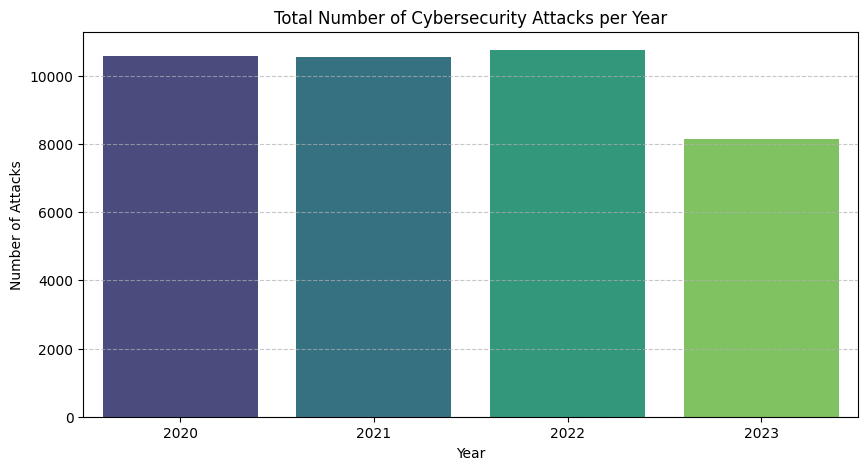

In [11]:
#2.1. Count total attacks per year

attack_count_by_year = df["Year"].value_counts().sort_index()
# Display the result
print("Total Number of Attacks per Year:")
print(attack_count_by_year)
# Display total attacks per year in the chart
plt.figure(figsize=(10, 5))
sns.barplot(x=attack_count_by_year.index, y=attack_count_by_year.values, palette="viridis")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Total Number of Cybersecurity Attacks per Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Year         2020  2021  2022  2023
Month_short                        
Jan           814   858   883   823
Feb           830   788   807   807
Mar           906   902   925   945
Apr           825   865   884   847
May           904   874   909   908
Jun           889   929   928   863
Jul           880   904   950   889
Aug           904   898   905   908
Sep           877   909   843   853
Oct           905   891   897   296
Nov           915   869   919     0
Dec           924   851   900     0


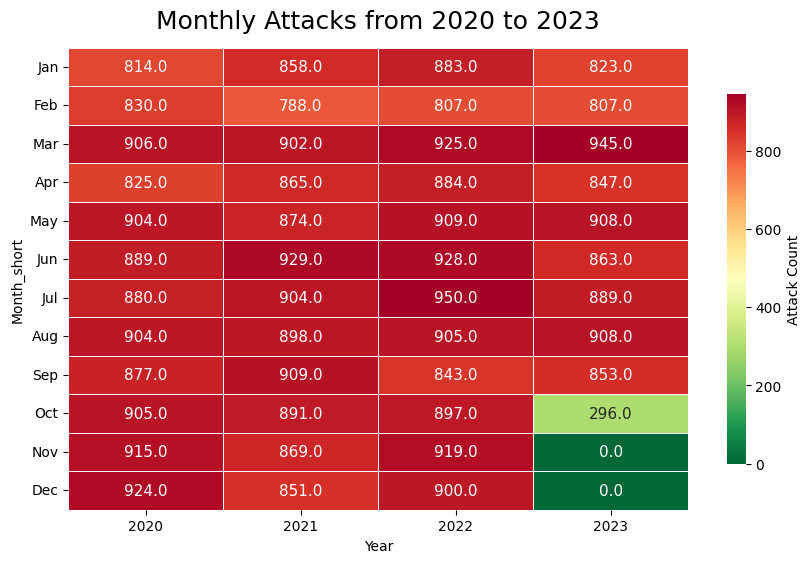

In [ ]:
# 2.2. Counting attacks for each month and display in the pivot table
all_month_year_df = pd.pivot_table(df, values='Attack Type',
                                   index=["Month_short"],
                                   columns=["Year"],
                                   fill_value=0,                                    
                                   aggfunc="count")

# Shorting the month from Jan to Dec
all_month_year_df = all_month_year_df.reindex(calendar.month_abbr[1:])
print(all_month_year_df)

# Creating headmap to display attacks for each month
plt.figure(figsize=(10, 6))
ax = sns.heatmap(all_month_year_df, cmap='RdYlGn_r',
                 robust=True,
                 fmt='.1f',
                 annot=True,
                 linewidths=.5,
                 annot_kws={'size':11},
                 cbar_kws={'shrink':.8, 'label':'Attack Count'})
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Monthly Attacks from 2020 to 2023', fontdict={'fontsize':18}, pad=14)
plt.show()

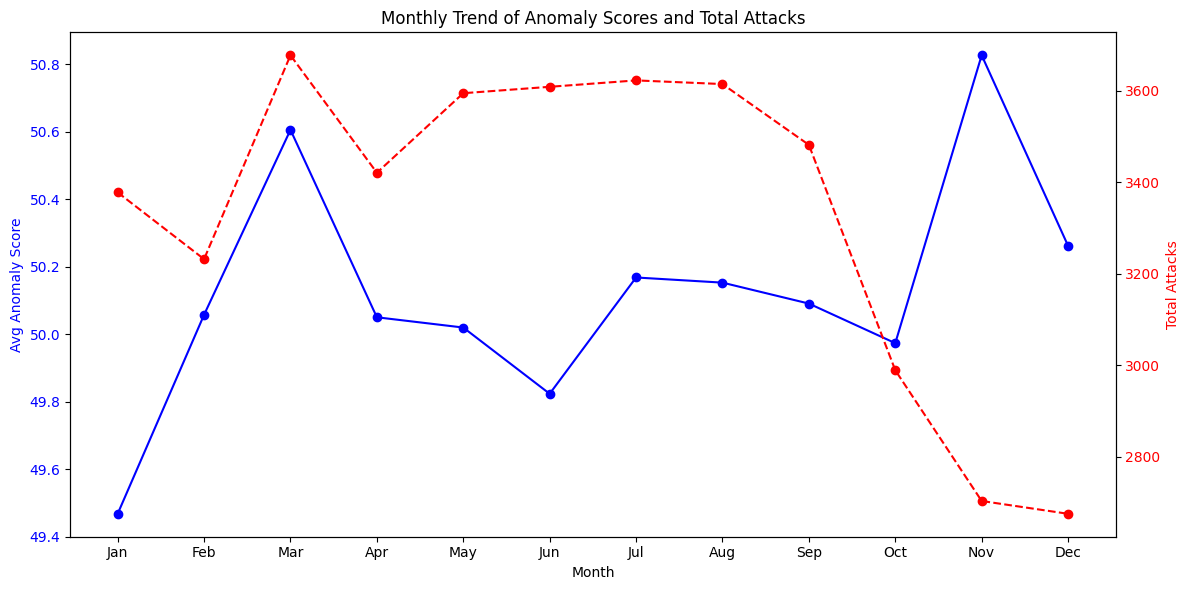

In [ ]:
# 2.3. Anomaly Scores and Number of Attacks by month 
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Anomaly Scores
ax1.set_xlabel("Month")
ax1.set_ylabel("Avg Anomaly Score", color="blue")
ax1.plot(monthly_data["Month"], monthly_data["Anomaly Scores"], marker="o", color="blue", label="Avg Anomaly Score")
ax1.tick_params(axis="y", labelcolor="blue")

# Create second Y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("Total Attacks", color="red")
ax2.plot(monthly_data["Month"], monthly_data["Total Attacks"], marker="o", linestyle="dashed", color="red", label="Total Attacks")
ax2.tick_params(axis="y", labelcolor="red")

# Labels & Legends
plt.title("Monthly Trend of Anomaly Scores and Total Attacks")
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
fig.tight_layout()
plt.show()

  Attack Type  Count
0        DDoS  13428
1     Malware  13307
2   Intrusion  13265


C:\Users\annaq\AppData\Local\Temp\ipykernel_46256\1253939110.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=attack_counts, x="Attack Type", y="Count", palette="viridis")


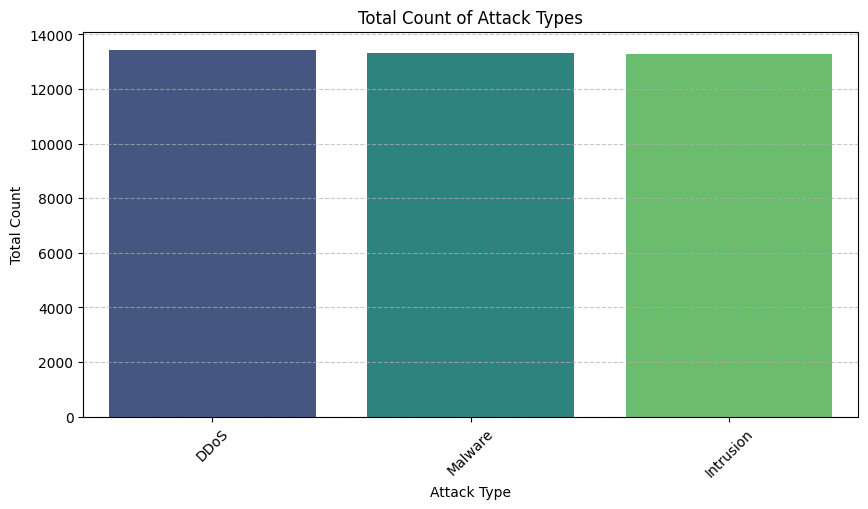

In [14]:
#2.4. Total cybersecurity attacks by attack type
attack_counts = df["Attack Type"].value_counts().reset_index()
attack_counts.columns = ["Attack Type", "Count"]
print(attack_counts)

# Display data in the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=attack_counts, x="Attack Type", y="Count", palette="viridis")

plt.xlabel("Attack Type")
plt.ylabel("Total Count")
plt.title("Total Count of Attack Types")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

Attacks by Year:
Attack Type  DDoS  Intrusion  Malware
Year                                 
2020         3533       3551     3489
2021         3545       3475     3518
2022         3558       3563     3629
2023         2792       2676     2671


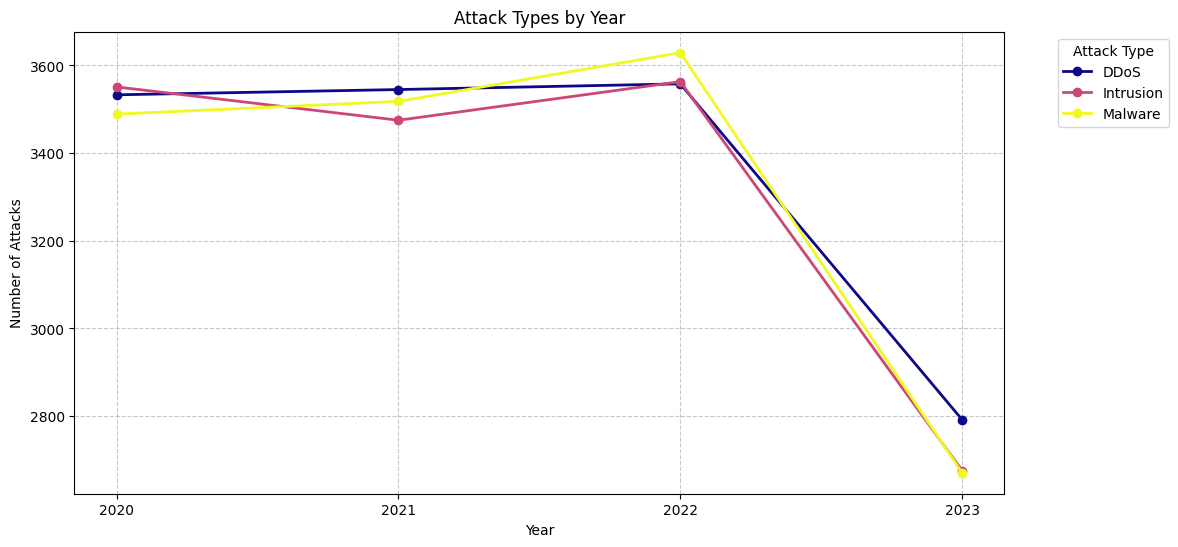

In [15]:
# 2.5. Count attack types by year
attack_by_year = df.groupby("Year")["Attack Type"].value_counts().unstack()
# Display the grouped data
print("Attacks by Year:")
print(attack_by_year)
# Display attack types by year in the line chart
attack_by_year.plot(kind="line", marker="o", linewidth=2, figsize=(12, 6), colormap="plasma")
plt.xticks(ticks=attack_by_year.index, labels=attack_by_year.index.astype(int))
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Attack Types by Year")
plt.legend(title="Attack Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


Attack Type  DDoS  Intrusion  Malware
Month                                
1            1099       1116     1163
2            1085       1107     1040
3            1299       1182     1197
4            1166       1140     1115
5            1200       1212     1183
6            1190       1268     1151
7            1163       1224     1236
8            1226       1173     1216
9            1221       1089     1172
10           1015        961     1013
11            869        899      935
12            895        894      886


<Figure size 1200x600 with 0 Axes>

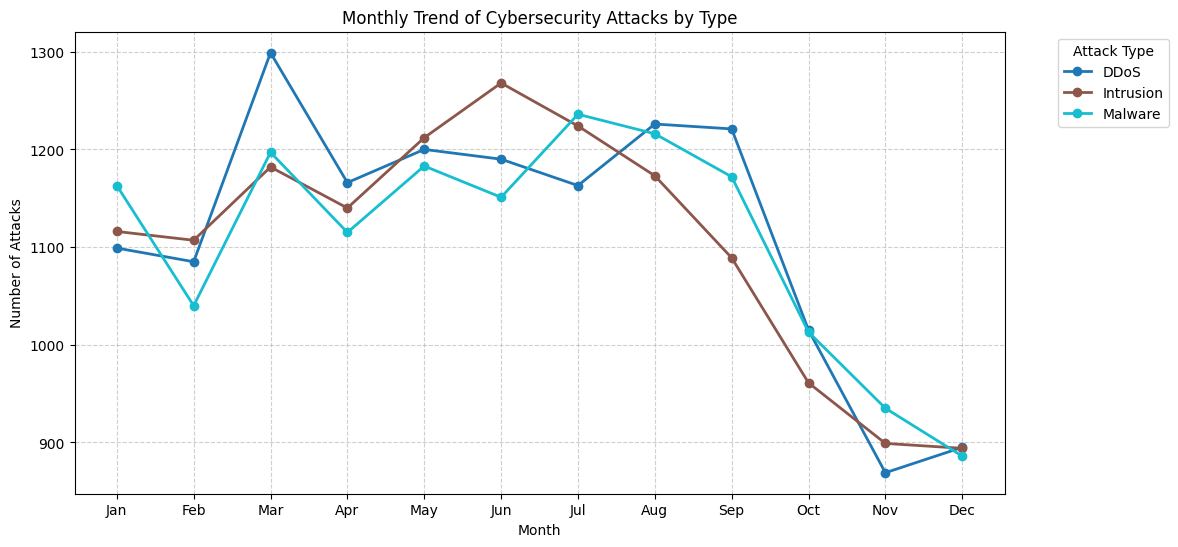

In [21]:
#2.6. Monthly trend of attack types
# Group by month and attack type
monthly_attack_trend = df.groupby(["Month"])["Attack Type"].value_counts().unstack()
# Sort by month order (1-12)
monthly_attack_trend = monthly_attack_trend.sort_index()
# Print the result as a DataFrame
print(monthly_attack_trend)
# Plot the data
plt.figure(figsize=(12, 6))
monthly_attack_trend.plot(kind="line", marker="o", figsize=(12, 6), colormap="tab10", linewidth=2)
plt.xlabel("Month")
plt.ylabel("Number of Attacks")
plt.title("Monthly Trend of Cybersecurity Attacks by Type")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Attack Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Weekly Trend of Attacks by Type:
Attack Type             DDoS  Intrusion  Malware
DayofWeek Weekday Name                          
0         Mon           1906       1902     1944
1         Tue           2050       1904     1859
2         Wed           1863       1856     1880
3         Thu           1970       1858     1848
4         Fri           1877       1915     1961
5         Sat           1857       1902     1904
6         Sun           1905       1928     1911


<Figure size 1200x600 with 0 Axes>

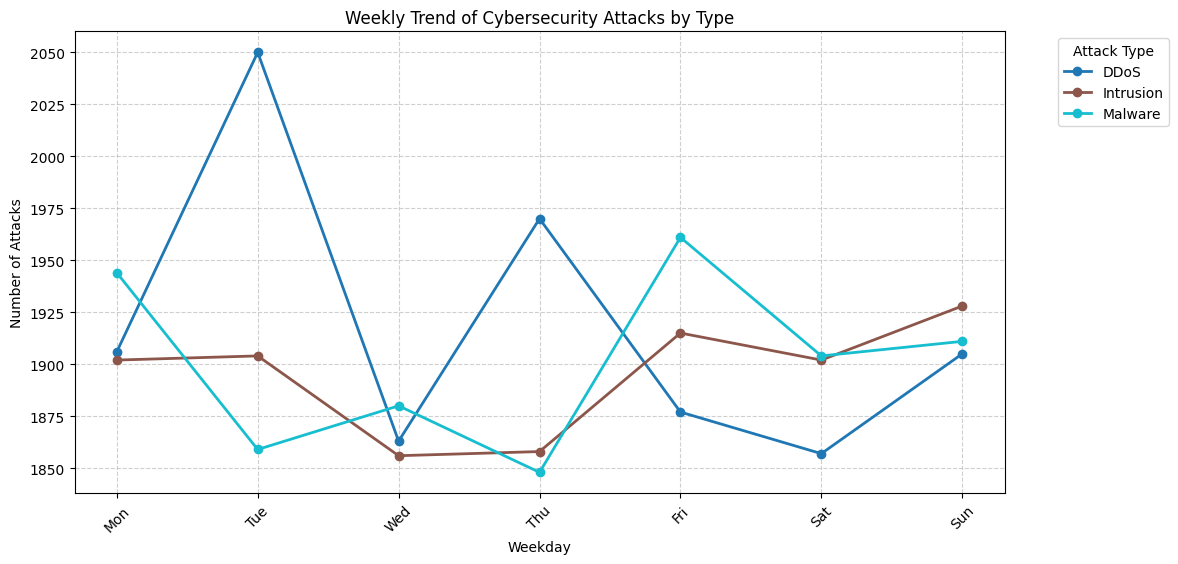

In [ ]:
# 2.7. Weekly trend of attack types

# Map weekday numbers to weekday names
weekday_mapping = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
df["Weekday Name"] = df["DayofWeek"].map(weekday_mapping)

# Group by week and attack type
weekly_attack_trend = df.groupby(["DayofWeek", "Weekday Name"])["Attack Type"].value_counts().unstack()

# Sort by week order (Monday-Sunday)
weekly_attack_trend = weekly_attack_trend.sort_index()

# Print the result as a DataFrame
print("Weekly Trend of Attacks by Type:")
print(weekly_attack_trend)

# Display data in the chart
plt.figure(figsize=(12, 6))
weekly_attack_trend.plot(kind="line", marker="o", figsize=(12, 6), colormap="tab10", linewidth=2)
plt.xlabel("Weekday")
plt.ylabel("Number of Attacks")
plt.title("Weekly Trend of Cybersecurity Attacks by Type")
plt.xticks(ticks=weekly_attack_trend.index.get_level_values(0), labels=weekly_attack_trend.index.get_level_values(1), rotation=45)
plt.legend(title="Attack Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Attacks by Protocol:
Attack Type  DDoS  Intrusion  Malware
Protocol                             
ICMP         4508       4460     4461
TCP          4438       4397     4437
UDP          4482       4408     4409


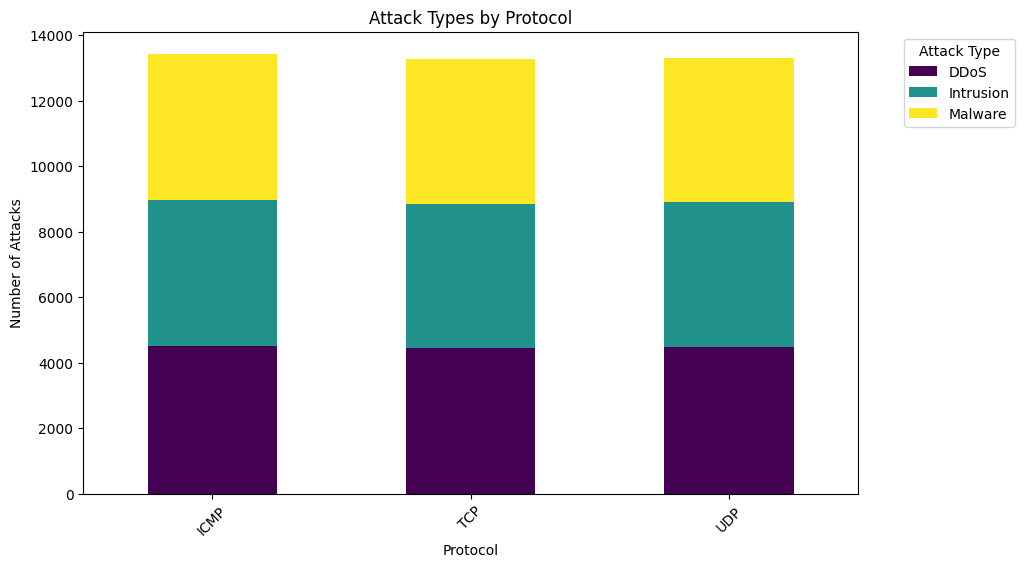

In [25]:
## 2.8. List attack types by protocol
attack_by_protocol = df.groupby("Protocol")["Attack Type"].value_counts().unstack()
# Display the grouped data
print("Attacks by Protocol:")
print(attack_by_protocol)
# Disply data in the chart
attack_by_protocol.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.xlabel("Protocol")
plt.ylabel("Number of Attacks")
plt.title("Attack Types by Protocol")
plt.xticks(rotation=45)
plt.legend(title="Attack Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


Protocol  ICMP   TCP   UDP
Year                      
2020      3619  3488  3466
2021      3522  3486  3530
2022      3574  3595  3581
2023      2714  2703  2722


<Figure size 1200x600 with 0 Axes>

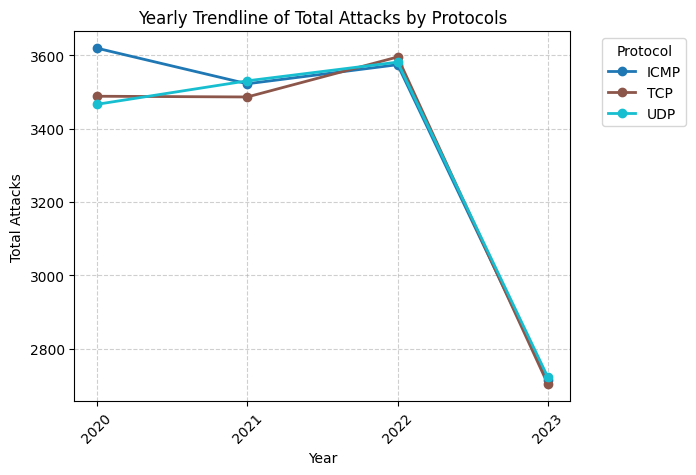

In [ ]:

# 2.9. Yearly trend of the total attacks by Protocols
yearly_protocol_trend = df.groupby(["Year", "Protocol"]).size().unstack(fill_value=0)
print(yearly_protocol_trend)
# Display the data as a line chart
plt.figure(figsize=(12, 6))
yearly_protocol_trend.plot(kind="line", marker="o", linewidth=2, colormap="tab10")
plt.xlabel("Year")
plt.ylabel("Total Attacks")
plt.title("Yearly Trendline of Total Attacks by Protocols")
plt.xticks(ticks=yearly_protocol_trend.index, labels=yearly_protocol_trend.index.astype(str), rotation=45)
plt.legend(title="Protocol", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Protocol  ICMP   TCP   UDP
Month                     
1         1171  1103  1104
2         1064  1052  1116
3         1260  1213  1205
4         1136  1154  1131
5         1219  1175  1201
6         1231  1171  1207
7         1192  1210  1221
8         1224  1203  1188
9         1178  1160  1144
10         909  1043  1037
11         893   909   901
12         952   879   844


<Figure size 1200x600 with 0 Axes>

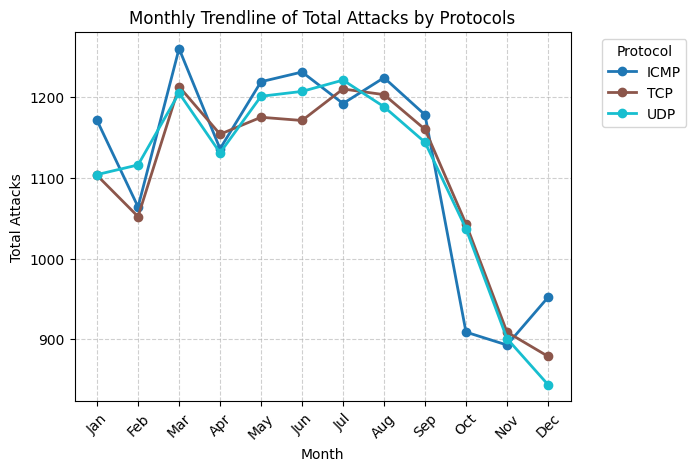

In [25]:
#2.10. Monthly trend of the total attacks by Protocols

monthly_protocol_trend = df.groupby(["Month", "Protocol"]).size().unstack(fill_value=0)
print(monthly_protocol_trend)

# Display the data as a line chart
plt.figure(figsize=(12, 6))
monthly_protocol_trend.plot(kind="line", marker="o", linewidth=2, colormap="tab10")
plt.xlabel("Month")
plt.ylabel("Total Attacks")
plt.title("Monthly Trendline of Total Attacks by Protocols")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.legend(title="Protocol", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


Packet Type  Control  Data
Month                     
1               1674  1704
2               1625  1607
3               1884  1794
4               1745  1676
5               1779  1816
6               1794  1815
7               1846  1777
8               1866  1749
9               1777  1705
10              1517  1472
11              1353  1350
12              1377  1298


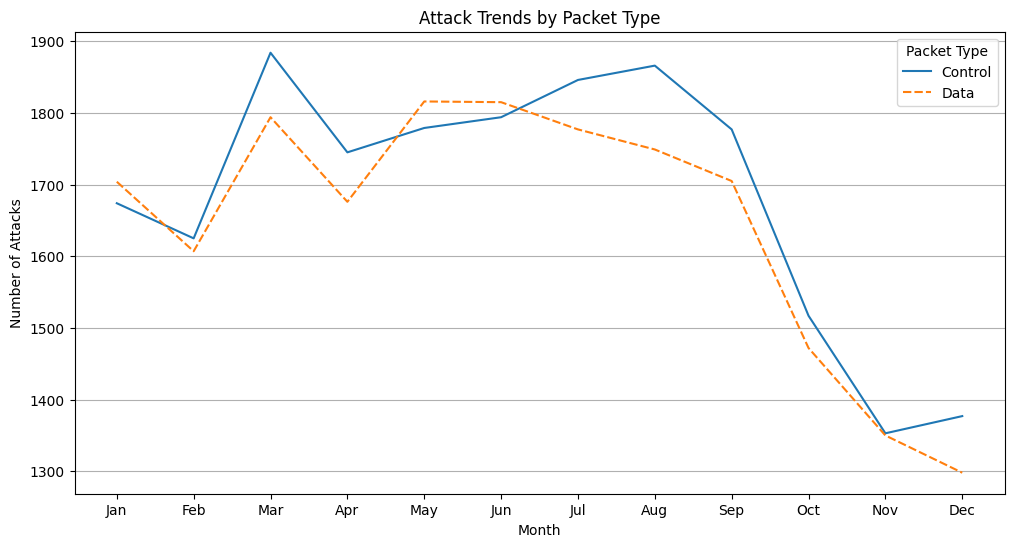

In [ ]:
#2.11. Monthly trends of attacks by Packet Type
attack_Packettype = df.groupby(["Month", "Packet Type"])["Attack Type"].count().unstack(fill_value=0)
print(attack_Packettype)
# Display data in the chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=attack_Packettype)
plt.xticks(range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                 "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("Number of Attacks")
plt.title("Attack Trends by Packet Type")
plt.grid(axis="y")
plt.show()

Browser
Mozilla    31951
Opera       8049
Name: count, dtype: int64


C:\Users\annaq\AppData\Local\Temp\ipykernel_46256\198188835.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=browser_counts.index, y=browser_counts.values, palette="viridis")


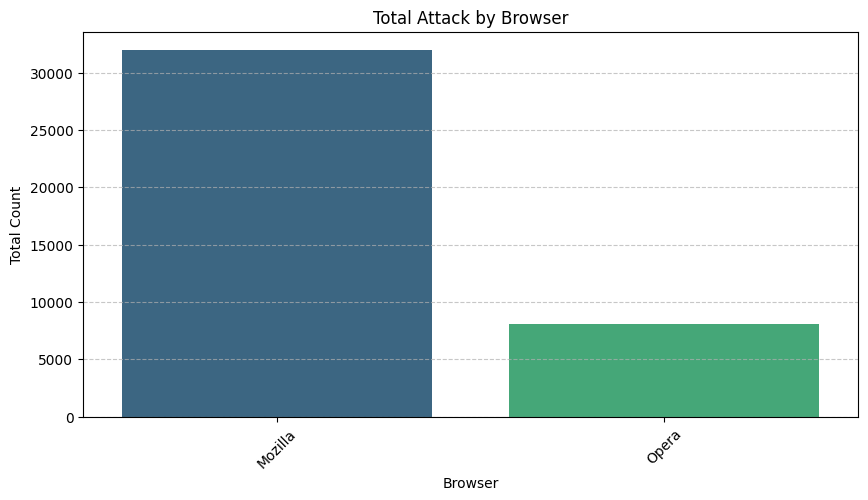

In [66]:
#2.12. Total attacks by browsers
browser_counts = df["Browser"].value_counts()
print(browser_counts)
# Display data in the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=browser_counts.index, y=browser_counts.values, palette="viridis")
plt.xlabel("Browser")
plt.ylabel("Total Count")
plt.title("Total Attack by Browser")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Yearly Trend of Browser Usage:
Browser  Mozilla  Opera
Year                   
2020        8420   2153
2021        8422   2116
2022        8604   2146
2023        6505   1634


<Figure size 1200x600 with 0 Axes>

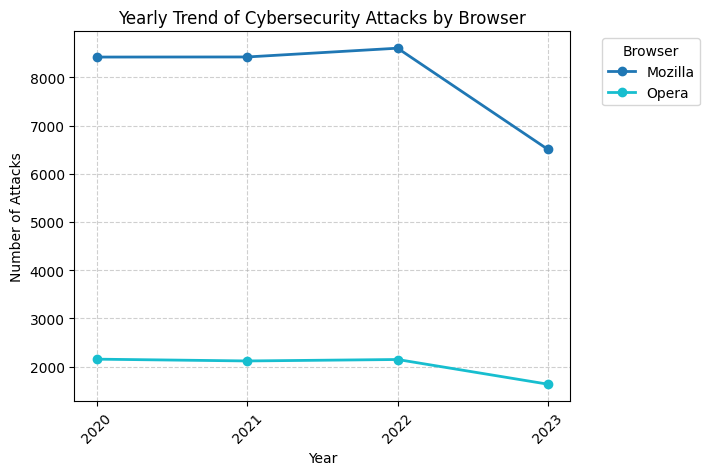

In [44]:
# 2.11. Yearly attack trend by network browser
# Group by Year and Browser
yearly_browser_trend = df.groupby(["Year", "Browser"]).size().unstack(fill_value=0)

# Print the result as a DataFrame
print("Yearly Trend of Browser Usage:")
print(yearly_browser_trend)

# Display data in the line chart
plt.figure(figsize=(12, 6))
yearly_browser_trend.plot(kind="line", marker="o", linewidth=2, colormap="tab10")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Yearly Trend of Cybersecurity Attacks by Browser")
plt.xticks(ticks=yearly_browser_trend.index, labels=yearly_browser_trend.index.astype(int), rotation=45)
plt.legend(title="Browser", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



Browser  Mozilla  Opera
Month                  
1           2643    735
2           2598    634
3           2953    725
4           2726    695
5           2861    734
6           2893    716
7           2879    744
8           2900    715
9           2782    700
10          2380    609
11          2175    528
12          2161    514


<Figure size 1200x600 with 0 Axes>

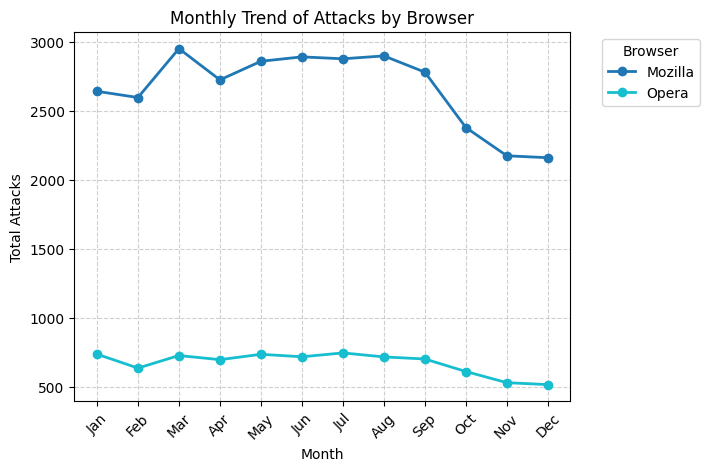

In [47]:
# 2.12. Monthly Trend of Attacks by Browsers
monthly_browser_trend = df.groupby(["Month", "Browser"]).size().unstack(fill_value=0)
print(monthly_browser_trend)
# Display the data as a line chart
plt.figure(figsize=(12, 6))
monthly_browser_trend.plot(kind="line", marker="o", linewidth=2, colormap="tab10")
plt.xlabel("Month")
plt.ylabel("Total Attacks")
plt.title("Monthly Trend of Attacks by Browser")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.legend(title="Browser", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Network Segment  Segment A  Segment B  Segment C
Year                                            
2020                  3583       3451       3539
2021                  3480       3456       3602
2022                  3480       3629       3641
2023                  2730       2783       2626


<Figure size 1200x600 with 0 Axes>

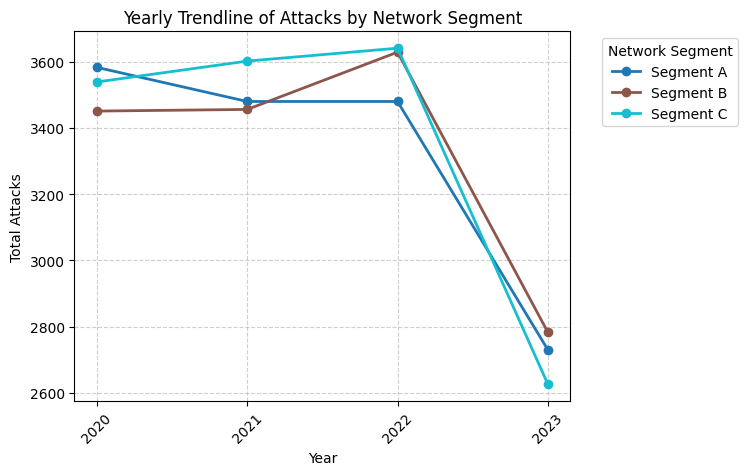

In [ ]:
# 2.13. Yearly Trendline of Attacks by Network Segment
yearly_network_trend = df.groupby(["Year", "Network Segment"]).size().unstack(fill_value=0)
print(yearly_network_trend)
# Display the data as a line chart
plt.figure(figsize=(12, 6))
yearly_network_trend.plot(kind="line", marker="o", linewidth=2, colormap="tab10")

plt.xlabel("Year")
plt.ylabel("Total Attacks")
plt.title("Yearly Trendline of Attacks by Network Segment")
plt.xticks(ticks=yearly_network_trend.index, labels=yearly_network_trend.index.astype(int), rotation=45)
plt.legend(title="Network Segment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

Network Segment  Segment A  Segment B  Segment C
Month                                           
1                     1091       1133       1154
2                     1072       1025       1135
3                     1219       1206       1253
4                     1160       1115       1146
5                     1235       1180       1180
6                     1202       1249       1158
7                     1197       1204       1222
8                     1219       1255       1141
9                     1166       1172       1144
10                     951        993       1045
11                     878        902        923
12                     883        885        907


<Figure size 1200x600 with 0 Axes>

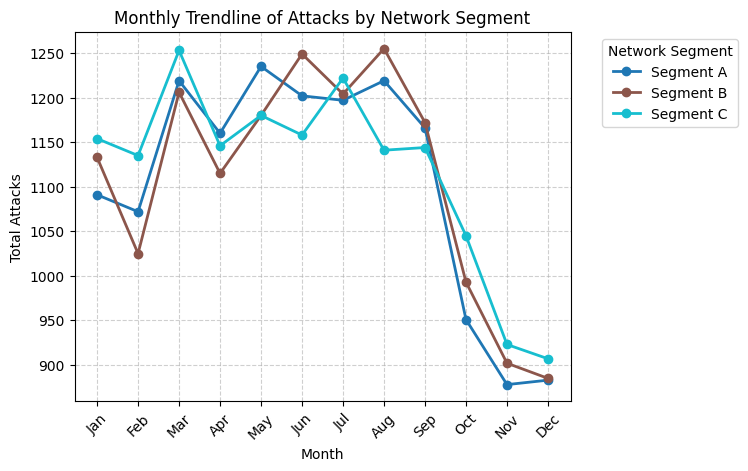

In [ ]:
# 2.14. Monthly Trendline of Attacks by Network Segment
monthly_network_trend = df.groupby(["Month", "Network Segment"]).size().unstack(fill_value=0)
print(monthly_network_trend)
# Display the data as a line chart
plt.figure(figsize=(12, 6))
monthly_network_trend.plot(kind="line", marker="o", linewidth=2, colormap="tab10")

plt.xlabel("Month")
plt.ylabel("Total Attacks")
plt.title("Monthly Trendline of Attacks by Network Segment")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.legend(title="Network Segment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

Device/OS
Windows      17953
Linux         8840
Macintosh     5813
iPod          2656
Android       1620
iPhone        1567
iPad          1551
Name: count, dtype: int64


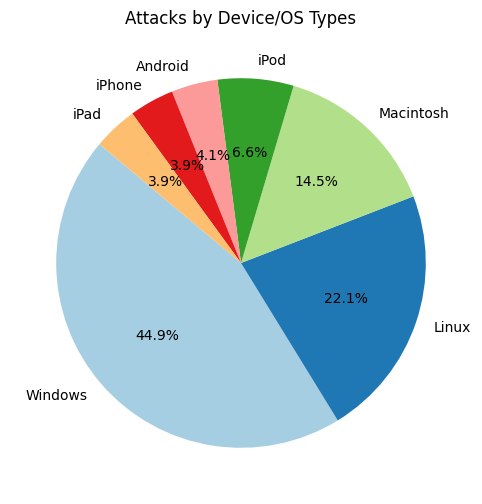

In [ ]:
#2.15. Cybersecurity attacks by Device types

def plot_device_os_pie_chart(df):
    # Count occurrences of each Device/OS
    device_counts = df['Device/OS'].value_counts()
    print(device_counts)
    # Plot Pie Chart
    plt.figure(figsize=(8, 6))
    plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title('Attacks by Device/OS Types')
    plt.show()

plot_device_os_pie_chart(df)

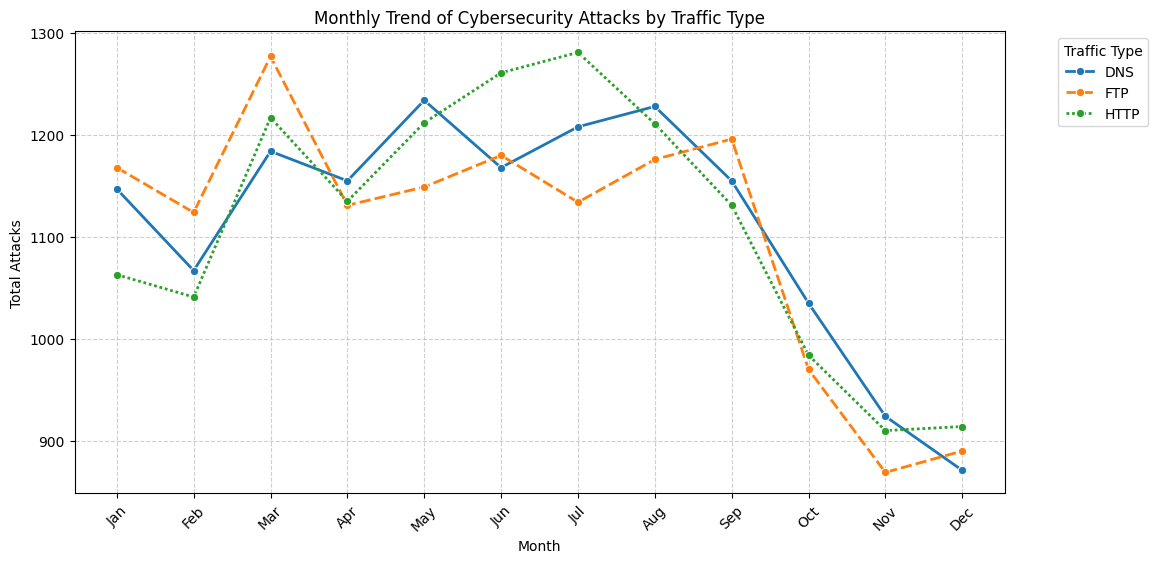

In [ ]:
# 2.16. Monthly trend of attacks by traffic types
# Group data by Month and Traffic Type, counting occurrences
monthly_traffic_trend = df.groupby(["Month", "Traffic Type"]).size().unstack(fill_value=0)

# Display data in the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_traffic_trend, marker="o", linewidth=2)

plt.xlabel("Month")
plt.ylabel("Total Attacks")
plt.title("Monthly Trend of Cybersecurity Attacks by Traffic Type")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.legend(title="Traffic Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


<Figure size 1200x600 with 0 Axes>

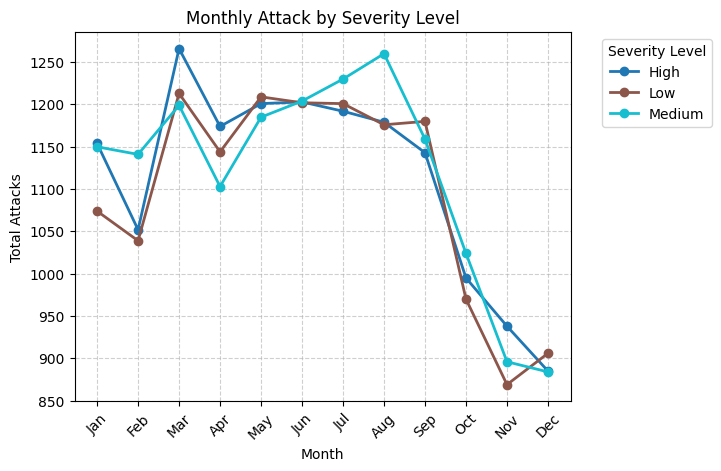

In [ ]:
# 2.17. Monthly Attacks by Severity Level
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by Month and Severity Level
monthly_severity_trend = df.groupby(["Month", "Severity Level"]).size().unstack(fill_value=0)

# Display the data as a line chart
plt.figure(figsize=(12, 6))
monthly_severity_trend.plot(kind="line", marker="o", linewidth=2, colormap="tab10")

plt.xlabel("Month")
plt.ylabel("Total Attacks")
plt.title("Monthly Attack by Severity Level")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.legend(title="Severity Level", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

